<a href="https://colab.research.google.com/github/akshat0522/Credit-Card-Default-Prediction-Project/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - Akshat Mishra

# **Project Summary -**

Credit card payment defaults pose a significant challenge for financial institutions, leading to potential financial losses and increased risk in credit management. Accurately identifying customers likely to default on their payments is crucial for mitigating risks, optimizing credit policies, and enhancing financial stability. Traditional binary classification methods, which classify clients as either \"credible\" or \"not credible,\" fail to provide the nuanced insights necessary for effective risk management.

This project aims to develop a machine learning-based predictive model to estimate the probability of default among credit card customers in Taiwan. By leveraging historical payment data and other customer attributes, the model seeks to offer a more granular assessment of default risk. The project also evaluates the model performance using advanced metrics like the Kolmogorov-Smirnov (K-S) statistic to ensure robust and actionable insights for financial decision-making.

# **GitHub Link -**

https://github.com/akshat0522/Credit-Card-Default-Prediction-Project

# **Problem Statement**


This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [120]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [79]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
Credit_Data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Module 4 : Machine Learning/Capstone Project Classification/default of credit card clients.xlsx', header=1)

### Dataset First View

In [81]:
# Dataset First Look
Credit_Data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [82]:
# Dataset Rows & Columns count
Credit_Data.shape

(30000, 25)

### Dataset Information

In [83]:
# Dataset Info
Credit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [84]:
# Dataset Duplicate Value Count
Credit_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [85]:
# Missing Values/Null Values Count
Credit_Data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


<Axes: >

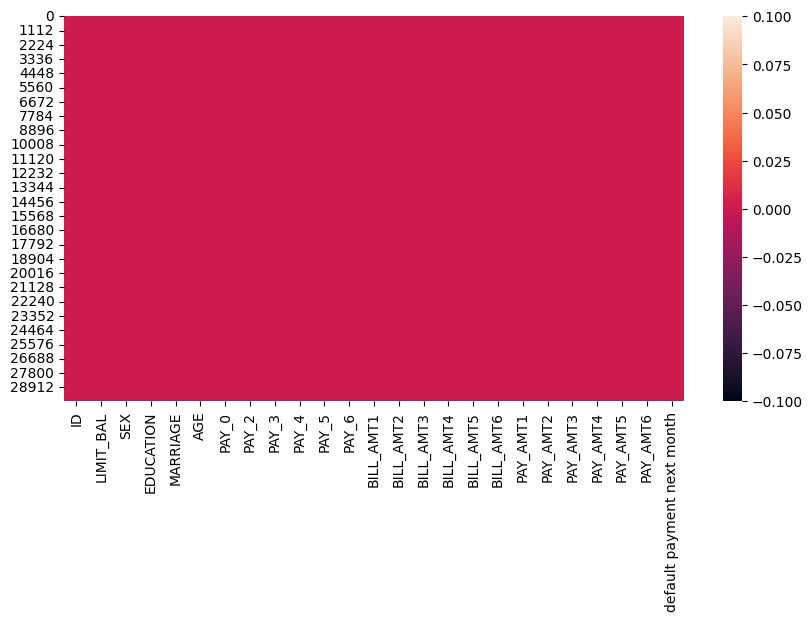

In [86]:
# Visualizing the missing values
plt.figure(figsize=(10, 5))
sns.heatmap(Credit_Data.isnull())

### What did you know about your dataset?

*   Number of rows and columns in dataset : ( 30001 , 25 )
*   Dataset has no null values.
*   Dataset has no duplicate rows.



## ***2. Understanding Your Variables***

In [87]:
# Dataset Columns
Credit_Data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [88]:
# Dataset Describe
Credit_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
- ID
- LIMIT_BAL : Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX : Gender (1 = male; 2 = female).
- EDUCATION : Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE : Marital status (1 = married; 2 = single; 3 = others).
- AGE : Age (year).

**PAY_0 - PAY_6 : History of past payment.**

  - From April to September of 2005, we tracked historical monthly payment records. The payback status is measured using the following scale :
    - -2 = no spending, &nbsp;• &nbsp;-1 = paid in full, and &nbsp;• &nbsp;0 = use of revolving credit (paid minimum only). &nbsp;• &nbsp; 1 = payment delay for one month; &nbsp;• &nbsp;2 = payment delay for two months; &nbsp;• &nbsp;3 = payment delay for three months; &nbsp;• &nbsp;&nbsp;• &nbsp;&nbsp;• &nbsp;&nbsp;• &nbsp;&nbsp;• &nbsp;; 8 = payment delay for eight months; &nbsp;• &nbsp;9 = payment delay for nine months and above.

- PAY_0: Repayment status in September, 2005
- PAY_2: Repayment status in August, 2005
- PAY_3: Repayment status in July, 2005
- PAY_4: Repayment status in June, 2005
- PAY_5: Repayment status in May, 2005
- PAY_6: Repayment status in April, 2005

**BILL_AMT1 - BILL_AMT6 : Amount of bill statement (NT dollar)**.
- BILL_AMT1: Amount of bill statement in September, 2005
- BILL_AMT2: Amount of bill statement in August, 2005
- BILL_AMT3: Amount of bill statement in July, 2005
- BILL_AMT4: Amount of bill statement in June, 2005
- BILL_AMT5: Amount of bill statement in May, 2005
- BILL_AMT6: Amount of bill statement in April, 2005

**PAY_AMT1 - PAY_AMT6 : Amount of previous payment (NT dollar).**
- PAY_AMT1: Amount of previous payment in September, 2005
- PAY_AMT2: Amount of previous payment in August, 2005
- PAY_AMT3: Amount of previous payment in July, 2005
- PAY_AMT4: Amount of previous payment in June, 2005
- PAY_AMT5: Amount of previous payment in May, 2005
- PAY_AMT6: Amount of previous payment in April, 2005

Target Variable
- default payment next month : Default payment (1 = Yes, 0 = No)
---
Source of this info. - https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Check Unique Values for each variable.

In [89]:
# Check Unique Values for each variable.
Credit_Data.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


## 3. ***Data Wrangling***

### Data Wrangling Code

In [90]:
# Write your code to make your dataset analysis ready.

# Rename Columns for better understanding
Credit_Data.rename(columns={'PAY_0':'PAY_Stat_SEP','PAY_2':'PAY_Stat_AUG','PAY_3':'PAY_Stat_JUL','PAY_4':'PAY_Stat_JUN','PAY_5':'PAY_Stat_MAY','PAY_6':'PAY_Stat_APR'},inplace=True)
Credit_Data.rename(columns={'BILL_AMT1':'BILL_AMT_SEP','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
Credit_Data.rename(columns={'PAY_AMT1':'PAID_AMT_SEP','PAY_AMT2':'PAID_AMT_AUG','PAY_AMT3':'PAID_AMT_JUL','PAY_AMT4':'PAID_AMT_JUN','PAY_AMT5':'PAID_AMT_MAY','PAY_AMT6':'PAID_AMT_APR'},inplace=True)


In [91]:
# Drop ID Column because it is of no use
Credit_Data = Credit_Data.drop('ID', axis=1)

In [92]:
# Creating a copy of dataset to make some changes for better visualization
Data = Credit_Data.copy()

In [93]:
# Replacing the label with values for better comprehension and visualization
Data['SEX'] = Data['SEX'].replace({1:'Male', 2:'Female'})
Data['EDUCATION'] = Data['EDUCATION'].replace({1:'Graduate School', 2:'University', 3:'High School', 4:'Others'})
Data['MARRIAGE'] = Data['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others'})
Data['default payment next month'] = Data['default payment next month'].replace({1:'Yes', 0:'No'})

In [94]:
Data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Stat_SEP,PAY_Stat_AUG,PAY_Stat_JUL,PAY_Stat_JUN,PAY_Stat_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAID_AMT_SEP,PAID_AMT_AUG,PAID_AMT_JUL,PAID_AMT_JUN,PAID_AMT_MAY,PAID_AMT_APR,default payment next month
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


### What all manipulations have you done and insights you found?

- Renamed the columns for better understanding.
  - PAY_0 ...... PAY_6 renamed to PAY_Stat_SEP ...... PAY_Stat_APR
  - BILL_AMT1 ..... BILL_AMT6 renamed to BILL_AMT_SEP ...... BILL_AMT_APR
  - PAY_AMT1 ..... PAY_AMT6 renamed to PAID_AMT_SEP ..... PAID_AMT_APR

- Droppped ID Column because it is of no use.
- Replaced values with their labels for better visualization and comprehension.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Distribution of Gender, Dafaulters on the basis of Gender)

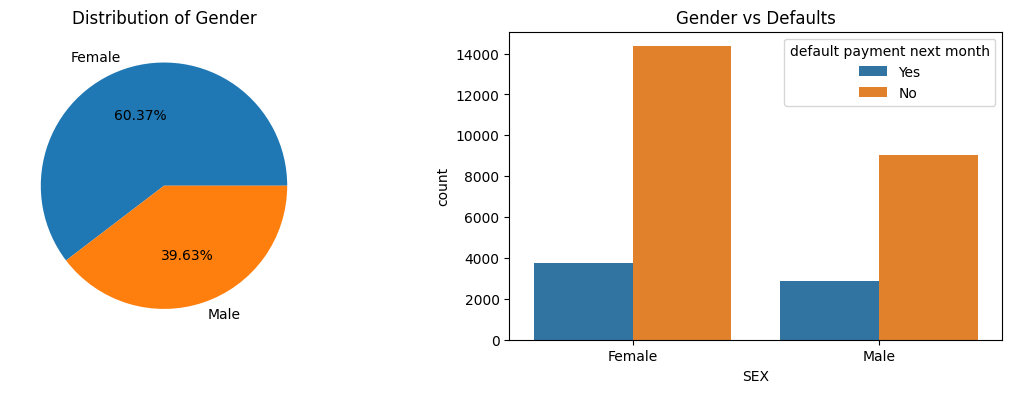

In [95]:
# Chart - 1

# Create a figure with two subplots
fig , ax = plt.subplots(1, 2, figsize = (14, 4))

# Visualize sex column using pie chart on 1st subplot
ax[0].pie(Data['SEX'].value_counts(), labels=['Female','Male'],autopct='%1.2f%%')
ax[0].set_title('Distribution of Gender')

# Visualise Gender wise Defaults on 2nd subplot
sns.countplot(x = 'SEX' , hue = 'default payment next month' , data = Data, ax = ax[1])

plt.title('Gender vs Defaults')
plt.show()

##### 1. Why did you pick the specific chart?

This is to check for the percentage of male and female credit card holders. Also to check who of them is defaulter.

##### 2. What is/are the insight(s) found from the chart?

- Number of female credit card holder is higher than male credit card holders.
- Insights shows that even after being higher in number than males in holding credit cards, females are still fewer defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Using the insight that females default less frequently can improve profitability, reduce risks by taking informed decisions.

But there can be some other reasons like less earning or spending pattern which should also be considered, that's why we need to look more deeper into the date.

#### Chart - 2 (Defaulters Vs Non-Defaulters)

In [96]:
Data['default payment next month'].value_counts(normalize=True) * 100

,proportion
default payment next month,
No,77.88
Yes,22.12


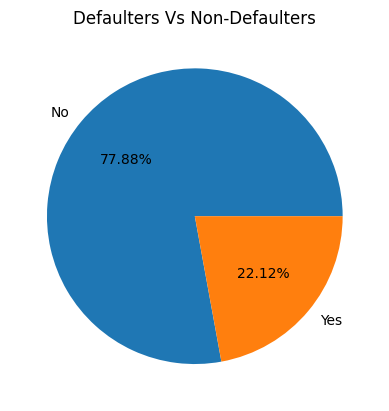

In [97]:
# Chart - 2

# Visualise 'default payment next month' to check the percentage of defaulters
plt.pie(Data['default payment next month'].value_counts(), labels = ['No','Yes'], autopct='%1.2f%%')
plt.title('Defaulters Vs Non-Defaulters')
plt.show()

##### 1. Why did you pick the specific chart?

To check, how many defaulters are present in the data.

##### 2. What is/are the insight(s) found from the chart?

We found that 22.12 % credit card holders are defaulters which is a huge number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Such a high number of defaulters is not good. With this insight, we can take necessary steps to reduce the numbers of defaulters.

#### Chart - 3 (Visualise Education Column and Checking defaulters according to education level.)

In [98]:
# Chart - 3

# Education value counts
Data['EDUCATION'].value_counts()

,count
EDUCATION,
University,14030
Graduate School,10585
High School,4917
5,280
Others,123
6,51
0,14


As we have some unknown values in other than 'University', 'Graduate School', 'High School', in Education column, we should merge them to 'Others' category.

In [99]:
Data['EDUCATION'] = Data['EDUCATION'].replace({5:'Others', 6:'Others', 0:'Others'})

In [100]:
Data['EDUCATION'].value_counts()

,count
EDUCATION,
University,14030
Graduate School,10585
High School,4917
Others,468


Now, as we can see, all values are categorised properly.

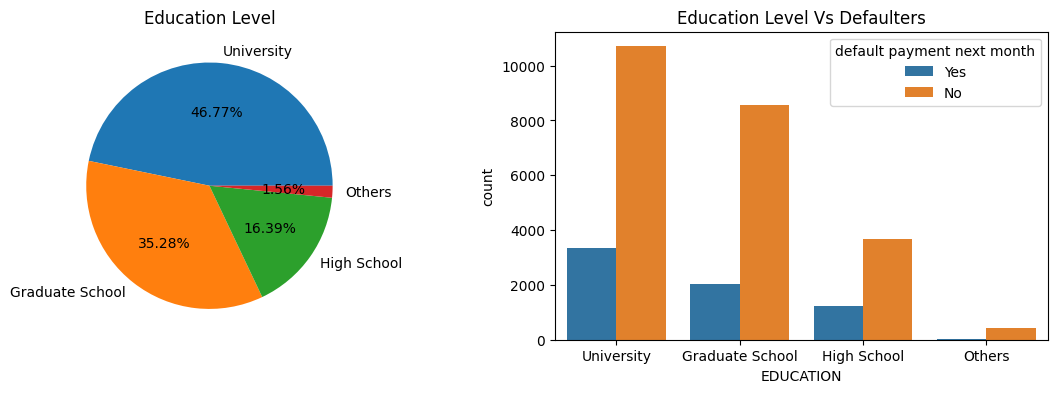

In [101]:
# Visualise Education column along with the Education Level Vs Defaulters

# Creating two sub plots
fig, ax = plt.subplots(1, 2, figsize = (14, 4))

# Visualize Education column
ax[0].pie(Data['EDUCATION'].value_counts(), labels = ['University', 'Graduate School', 'High School', 'Others'], autopct='%1.2f%%')
ax[0].set_title('Education Level')

sns.countplot(x = 'EDUCATION' , hue = 'default payment next month' , data = Data, ax = ax[1])
ax[1].set_title('Education Level Vs Defaulters')
plt.show()

##### 1. Why did you pick the specific chart?

To know about the education level of the credit card holders.

##### 2. What is/are the insight(s) found from the chart?

- The University group represents the largest number of credit card holders and likely contributes the most to defaults as well.
- Card holders with a Graduate School education are also substantial contributors but show slightly fewer defaulters compared to university clients.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Risk management strategies should target 'University' and 'Graduate School' group effectively.

#### Chart - 4 (Visualise Marriage column & Defaulters on the basis of Marital Status)

In [102]:
# Chart - 4

# Exploring Marriage Column
Data['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,15964
Married,13659
Others,323
0,54


There are 54 rows of unknown data present in dataset. We will merge them to others category.

In [103]:
# Replace rows with 0 values to 'Others'

Data['MARRIAGE'] = Data['MARRIAGE'].replace({0:'Others'})

In [104]:
Data['MARRIAGE'].value_counts(normalize=True) * 100

,proportion
MARRIAGE,
Single,53.213333
Married,45.530000
Others,1.256667


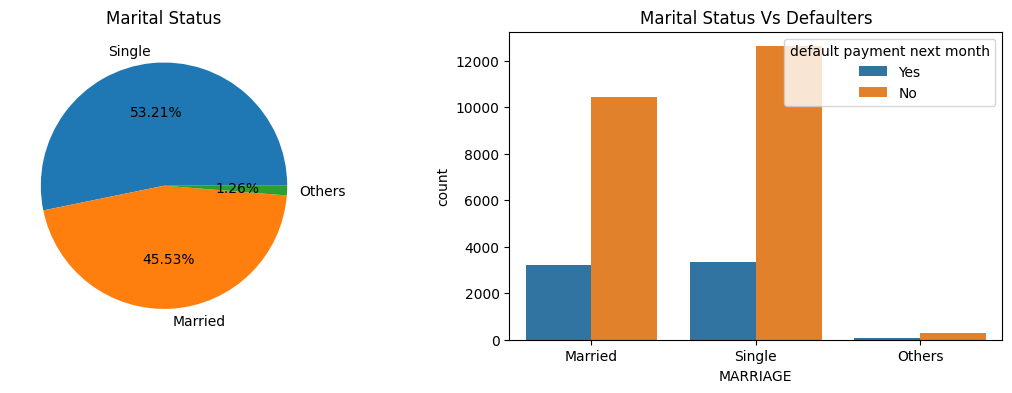

In [105]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize = (14, 4))

# Visualize Marital Status
ax[0].pie(Data['MARRIAGE'].value_counts(), labels = ['Single', 'Married', 'Others'], autopct='%1.2f%%')
ax[0].set_title('Marital Status')

# Visualise Marital Status Vs Defaulters
sns.countplot(x = Data['MARRIAGE'], hue = Data['default payment next month'], data = Data, ax = ax[1])
ax[1].set_title('Marital Status Vs Defaulters')
plt.show()

##### 1. Why did you pick the specific chart?

- To check marital status of credit card holders.
- To know the number of defaulters according to their marital status.

##### 2. What is/are the insight(s) found from the chart?

Looking at the visualization, we can say that the highest number of credit card holders are single. But they are less likely to be defaulters comparative to married person in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After knowing that married person are more likely to be defaulters , the business can take more informed decision to lower this number.

#### Chart - 5 (Distribution of AGE column & Defaulters according to Age)

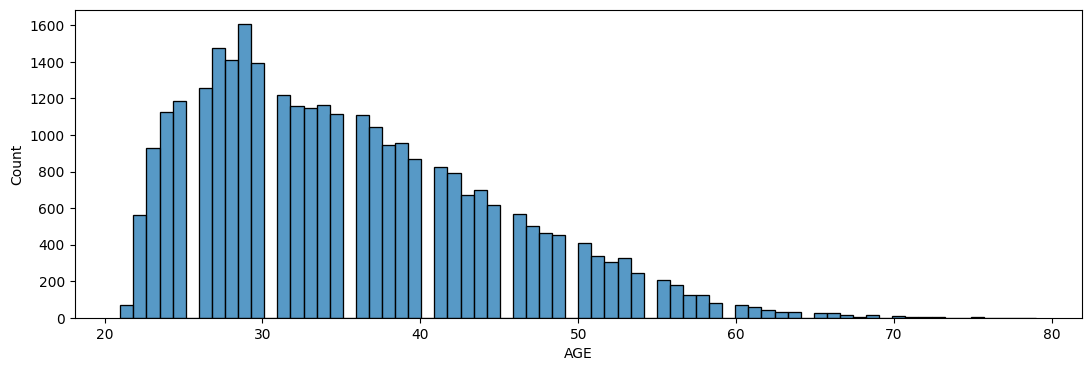

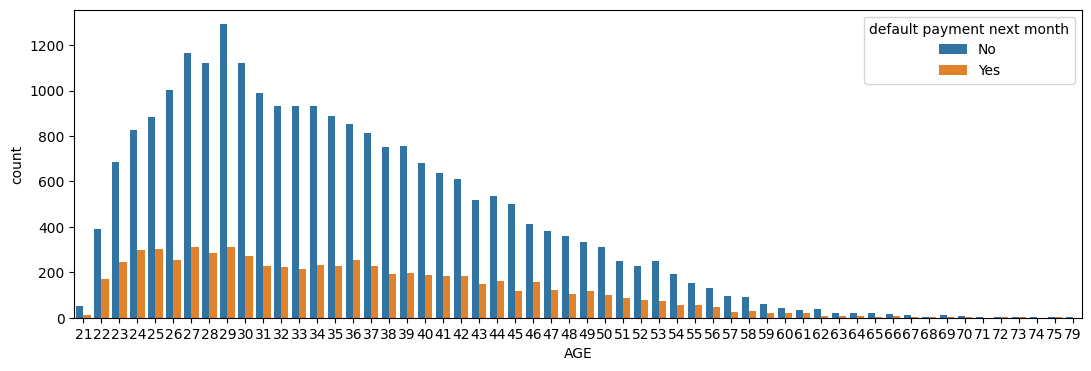

In [106]:
# Chart - 5

# Visualise Age Column
plt.figure(figsize = (13, 4))
sns.histplot(Data['AGE'])
plt.show()

# Visualise Defaulters according to Age
plt.figure(figsize = (13, 4))
sns.countplot(x = Data['AGE'], hue='default payment next month', data = Data)

plt.show()

##### 1. Why did you pick the specific chart?

- To check distribution of age of credit card holders.
- To see people of which age are more likely to be defaulters.

##### 2. What is/are the insight(s) found from the chart?

- The dataset likely has more young individuals compared to older ones and
Younger individuals may be more likely to default on credit card payments because:
  - They might have lower or unstable income sources (e.g., students, early-career professionals).
  - They may lack financial literacy or experience in managing credit effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Younger customers may need guidance on responsible credit usage, budgeting, and debt management.
- Since older individuals are less likely to default, banks may want to prioritize retaining them as loyal, low-risk clients.

#### Chart - 6 (Distribution of LIMIT_BAL column and Defaulters on the basis of credit limit)

In [107]:
Data['LIMIT_BAL'].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


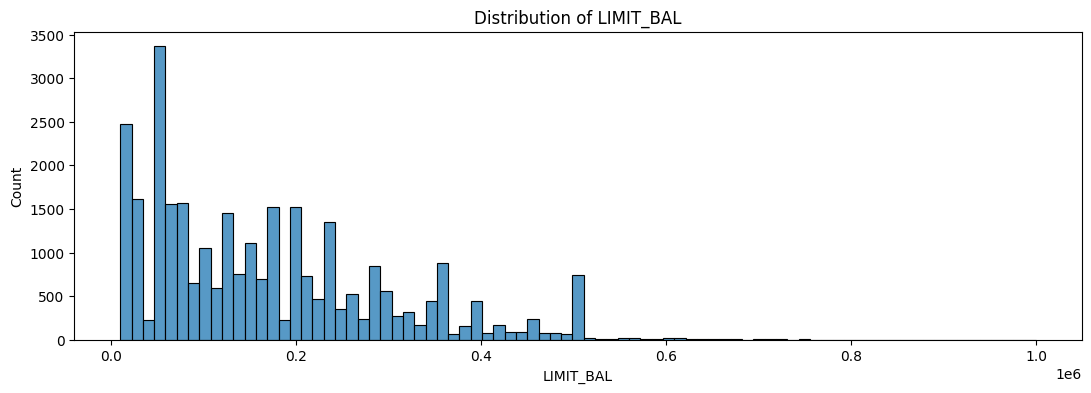

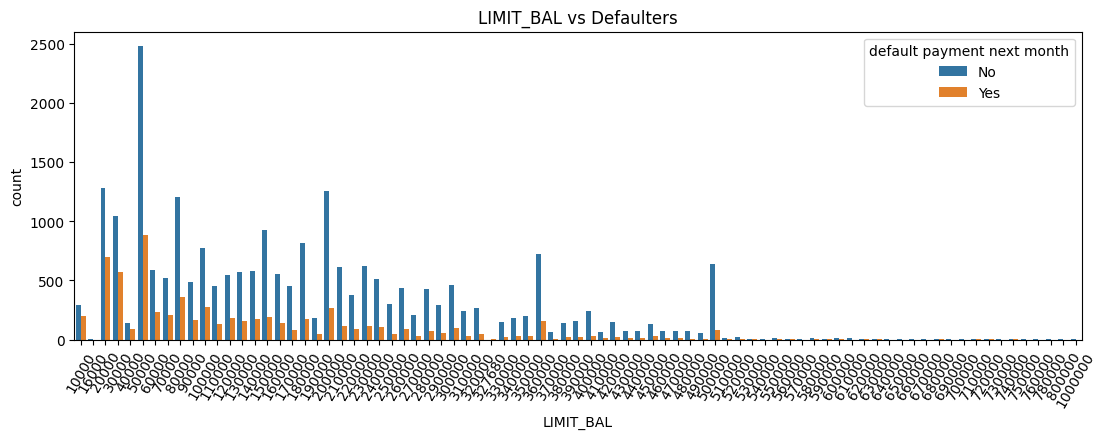

In [108]:
# Chart - 6 visualization code

# Visualize LIMIT_BAL column
plt.figure(figsize = (13, 4))
sns.histplot(Data['LIMIT_BAL'])
plt.title('Distribution of LIMIT_BAL')

# Visualize LIMIT_BAL vs Ddefaulters
plt.figure(figsize = (13, 4))
sns.countplot(x = 'LIMIT_BAL', hue = 'default payment next month', data = Data)
plt.tick_params(axis='x', labelrotation= 60)
plt.title('LIMIT_BAL vs Defaulters')
plt.show()

##### 1. Why did you pick the specific chart?

- To check the distribution of LIMIT_VAL column.
- To check Credit Limit Vs defaults.

##### 2. What is/are the insight(s) found from the chart?

- Maximum Credit card limit is below 1000000.
- Credit card holder with credit limit more than 500000 are very few in defaults payments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers with credit limits of 50,000 credit limit or more are more likely to default, so the bank should charge them in the event of a default and may cut their limit to avoid any form of damage to the company.

#### Chart - 7 (Distribution of monthly repayment status and Visualising Repayment Vs Defaulters)

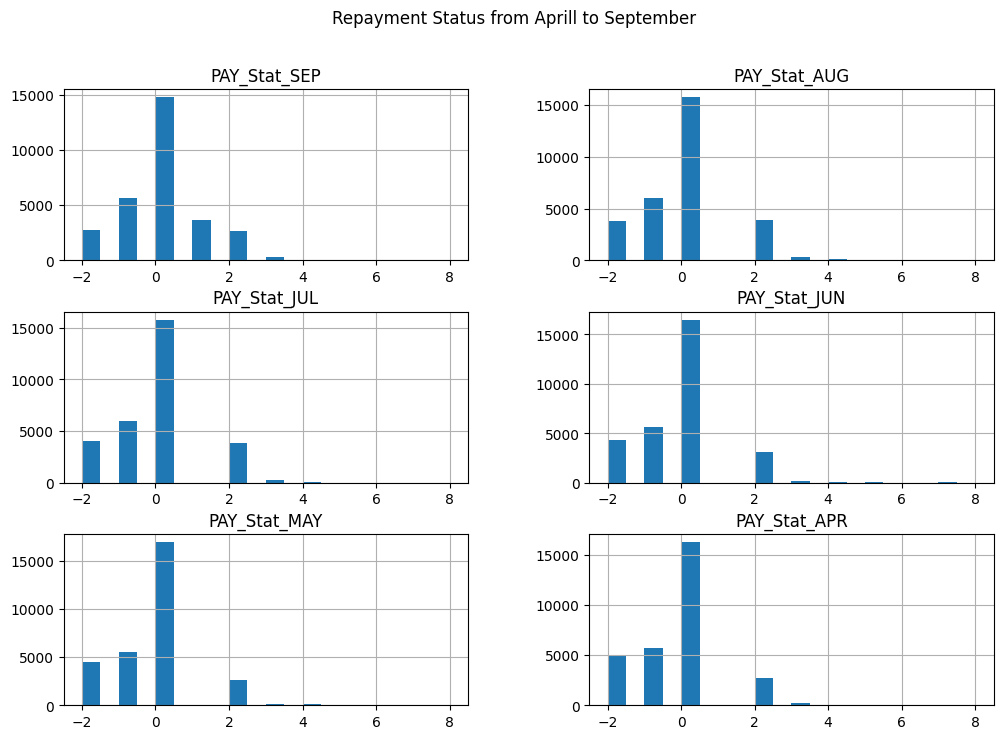

In [109]:
# Visualise Monthly Repayment Status ('PAY_Stat_SEP' to 'PAY_Stat_APR' columns)
subset = Data.iloc[:, 5:11]
subset.hist(bins=20, figsize=(12, 8))
plt.suptitle('Repayment Status from Aprill to September')
plt.show()

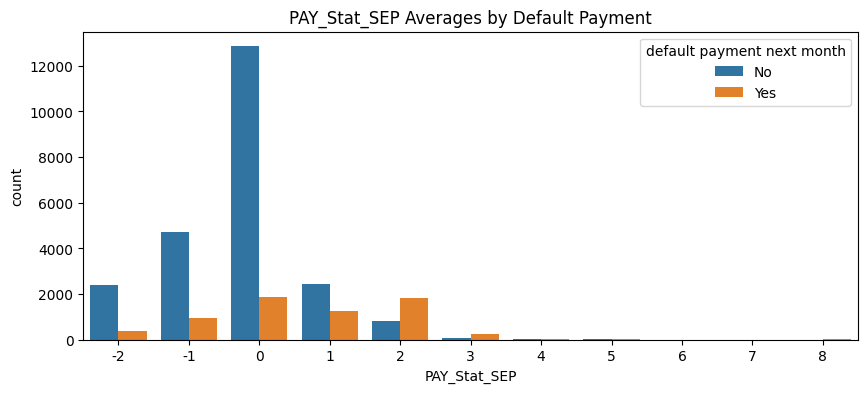

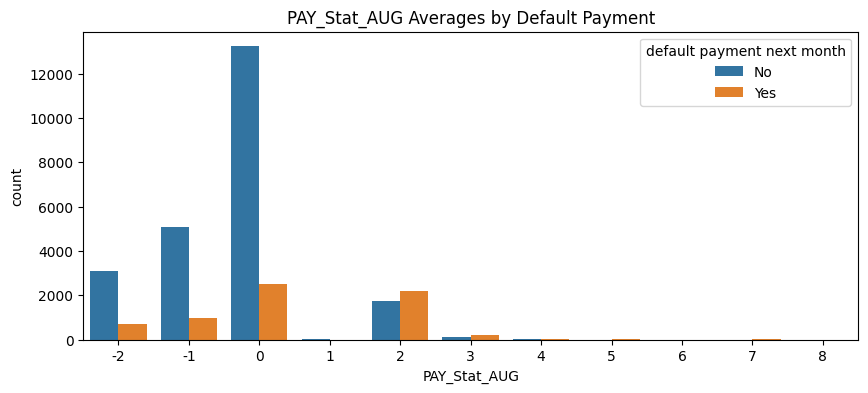

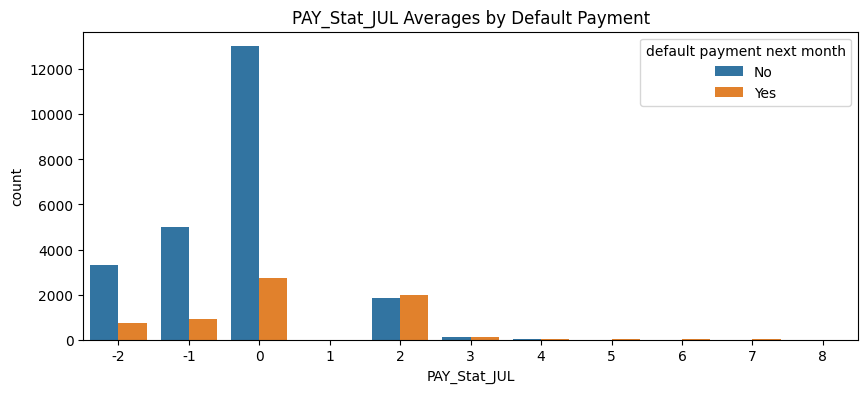

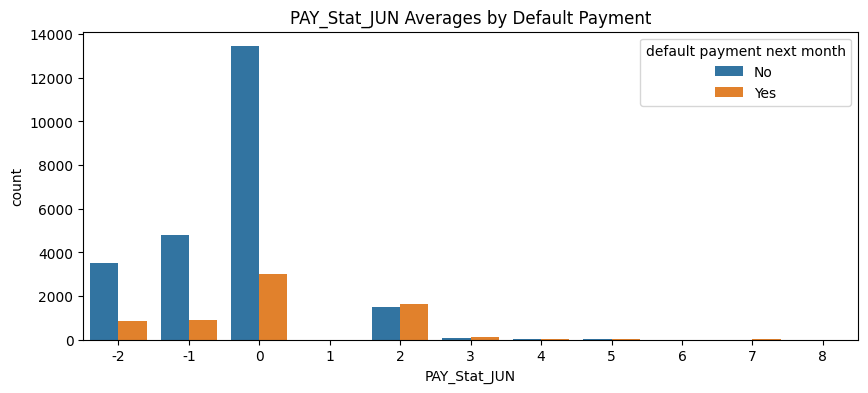

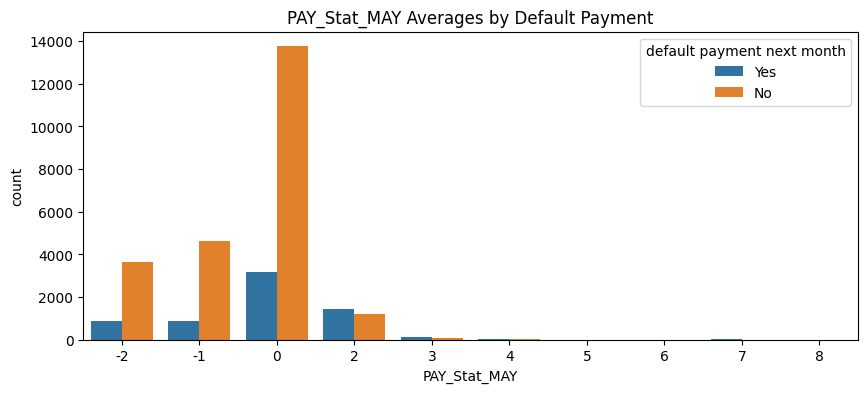

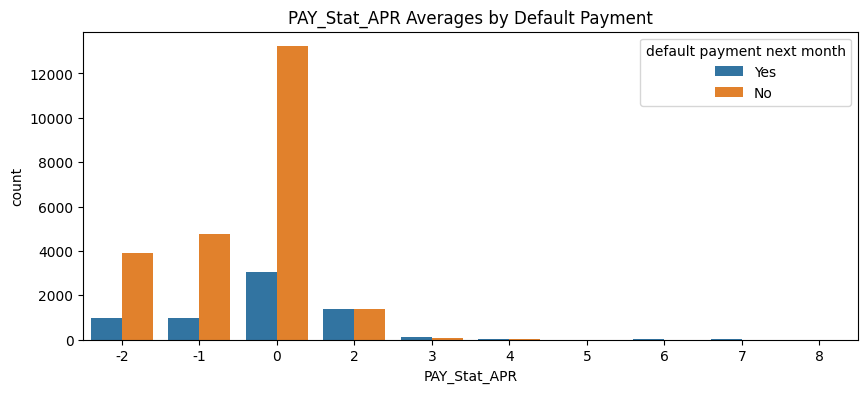

In [110]:
# Visualise Repayment Status Averages Vs Defaults
for column in Data.columns[5:11]:
    plt.figure(figsize=(10, 4))
    sns.countplot(x = column, hue='default payment next month', data=Data)
    plt.title(f'{column} Averages by Default Payment')
    plt.show()

##### 1. Why did you pick the specific chart?

Countplot is good to show the counts Categories in a better way. And used histograms to show the distribution of Repayment Status variables.

##### 2. What is/are the insight(s) found from the chart?

- Most people are using revolving credit by paying the minimum due amount only in every month.
- Customers who pay only the minimum repayment amount are more likely to default.
- When payment delay is 2 month, the default ratio is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When the payment is delayed 2 months, company should be actively look into the matter.
And business can use this information into their policies.

#### Chart - 8 (Visualization of BILL_AMT column Vs Default payment next month column)

In [111]:
Data.iloc[: , 11:17].describe()

,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [112]:
# Extacting columns of bill amount of different months from the dataset
bill_columns = Data.columns[11:17]

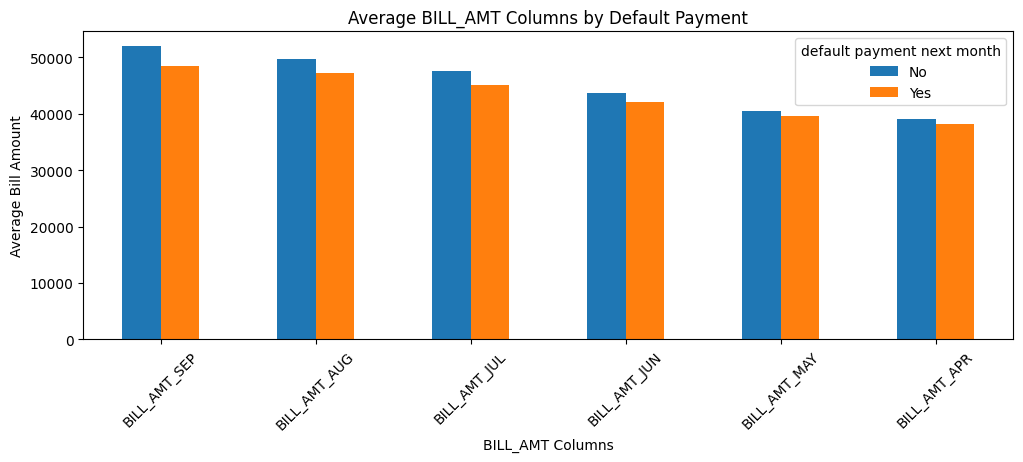

In [113]:
# Chart - 8

# Grouping by the monthly Bill amount columns to 'Default payment next month column' to compare
mean_bill_amt = Data.groupby('default payment next month')[bill_columns].mean().T

# Visualization code to see Bill amount vs Defaults
mean_bill_amt.plot(kind='bar', figsize=(12, 4))
plt.title('Average BILL_AMT Columns by Default Payment')
plt.ylabel('Average Bill Amount')
plt.xlabel('BILL_AMT Columns')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To compare bill amount Vs target variable 'default payment next month'

##### 2. What is/are the insight(s) found from the chart?

The plot does not show a notable difference in bill amounts between defaulters and non-defaulters. Both groups show a similar spread of bill amounts.

We can not clearly state anything out of it.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no notable insight from this plot.

#### Chart - 9 (Bill amounts Vs Defaults & Non-Defaults)

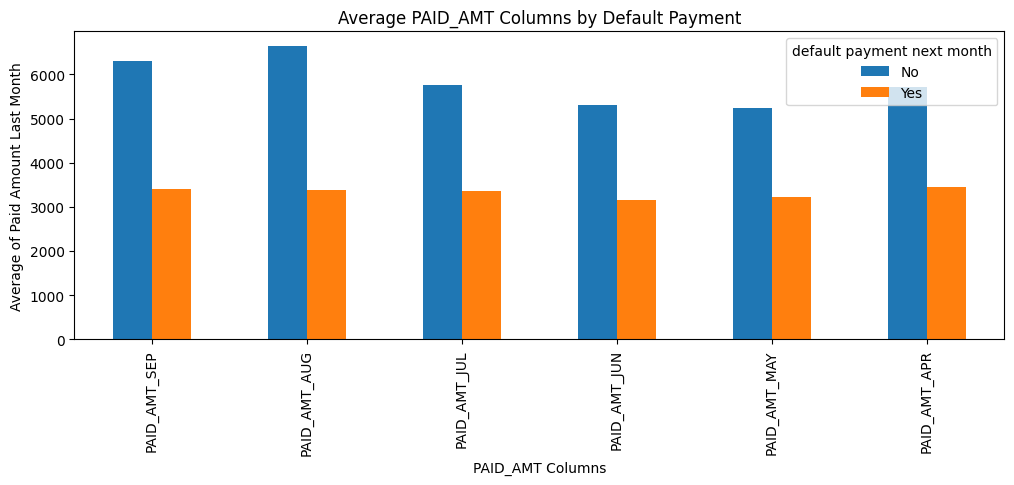

In [114]:
# Chart - 9 visualization code

# Extacting Paid Amount columns from the dataset
paid_last_mnth = Data.columns[17:23]
# Grouping by the monthly Bill amount columns to 'Default payment next month column' to compare
mean_paid_amt = Data.groupby('default payment next month')[paid_last_mnth].mean().T

# Visualization code to see Bill amount vs Defaults
mean_paid_amt.plot(kind='bar', figsize=(12, 4))
plt.title('Average PAID_AMT Columns by Default Payment')
plt.ylabel('Average of Paid Amount Last Month')
plt.xlabel('PAID_AMT Columns')
plt.show()


##### 1. Why did you pick the specific chart?

To check the paid amount vs default payments.

##### 2. What is/are the insight(s) found from the chart?

- Across all months (April to September), non-defaulters have consistently higher average payment amounts than defaulters.

This suggests that individuals who do not default are generally paying more towards their credit card bills.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Businesses can use this information to flag accounts with consistently low payments for further monitoring.
- Encourage timely and higher payments to those who are paying less against their bill amount.

#### Chart - 10 - Correlation Heatmap

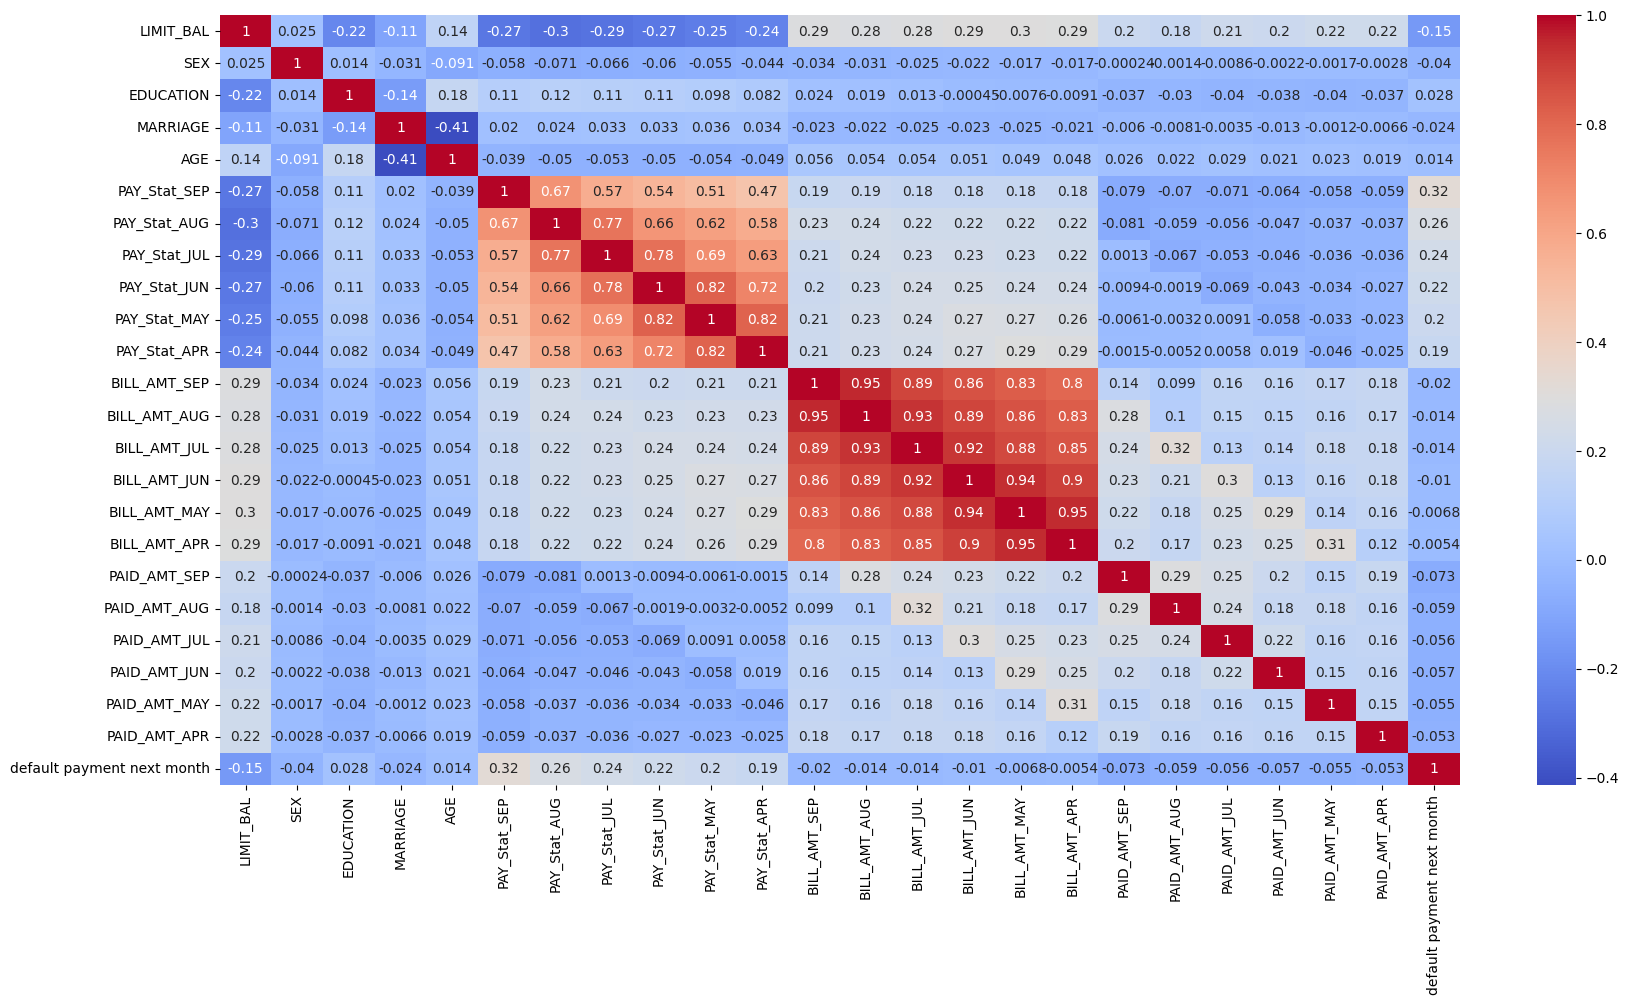

In [115]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 10))
sns.heatmap(Credit_Data.corr(), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation plot to understand which variables are related to one another and how strongly they are related.

##### 2. What is/are the insight(s) found from the chart?

- PAY_Stat_* , PAID_AMT_* , BILL_AMT_* columns are highly corelated to each other. We need to do something to reduce multicolinearity.
- PAY_Stat_* columns having a good corelation with the target variable 'Default payment next month'. So these columns are good predictive variables.

#### Chart - 11 - Pair Plot

In [116]:
# Columns to use for Pairplot

columns_for_pairplot = [
    'LIMIT_BAL',                                      # Reflect financial status and credit behavior
    'AGE',                                            # To Capture demographic influences.
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_Stat_SEP',                                   # Strongly correlated with default payment behavior.
    'BILL_AMT_SEP',                                   # Reflect financial status and credit behavior
    'PAID_AMT_SEP',                                   # Reflect financial status and credit behavior
    'default payment next month'                      # Target variable
]

In [117]:
Credit_Data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_Stat_SEP',
       'PAY_Stat_AUG', 'PAY_Stat_JUL', 'PAY_Stat_JUN', 'PAY_Stat_MAY',
       'PAY_Stat_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAID_AMT_SEP',
       'PAID_AMT_AUG', 'PAID_AMT_JUL', 'PAID_AMT_JUN', 'PAID_AMT_MAY',
       'PAID_AMT_APR', 'default payment next month'],
      dtype='object')

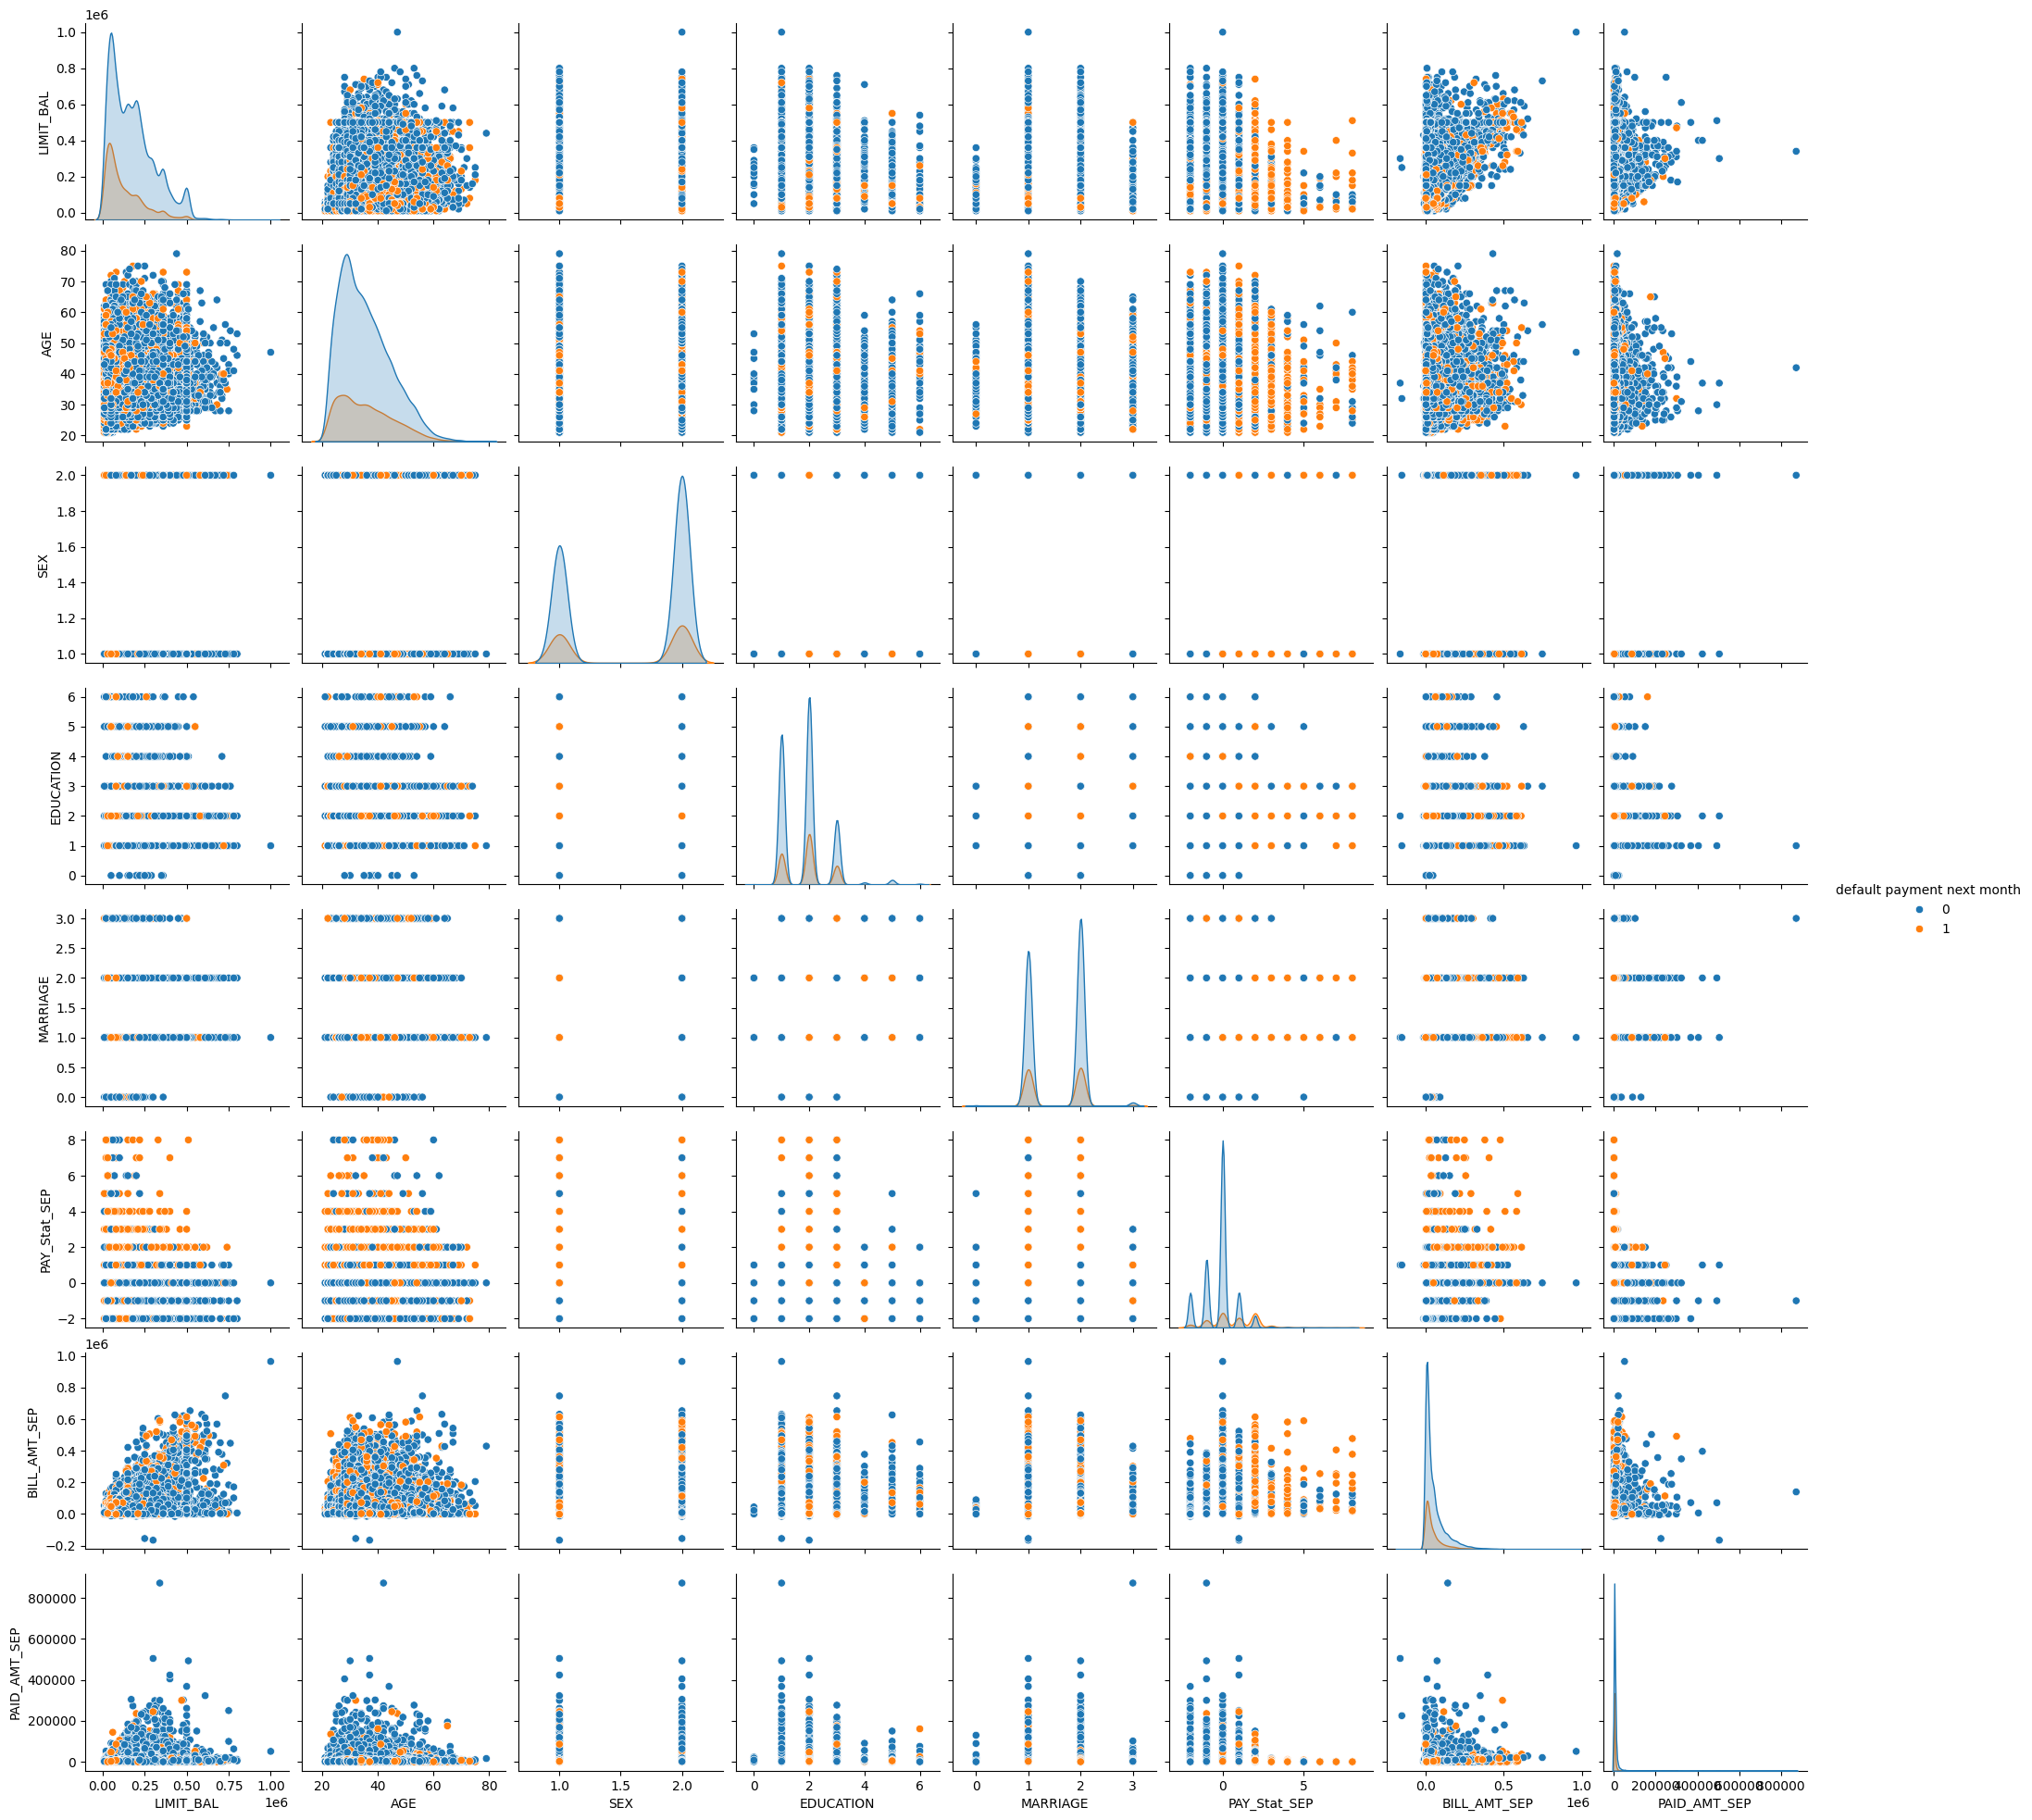

In [118]:
# Select the columns for pairplot
pairplot_data = Credit_Data[columns_for_pairplot]

# Plot the pairplot
sns.pairplot(pairplot_data, hue='default payment next month')
plt.show()

##### 1. Why did you pick the specific chart?

To look for the pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

- Variables like SEX, AGE, EDUCATION, and MARRIAGE do not show strong relationships with defaults on their own but could add value when combined with financial variables.
- PAY_Stat_* columns and PAID_AMT_* columns are the most distinct in separating default vs. non-default groups.
- LIMIT_BAL shows a weaker but still notable trend in differenciating between the groups.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 (Are demographic factors (e.g., AGE, SEX) associated with the likelihood of default?)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0) : Demographics (e.g., SEX, AGE) have no effect on default likelihood.
- Alternative Hypothesis (H1) : Demographics influence default likelihood.

#### 2. Perform an appropriate statistical test.

In [119]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2 (Does late payment status increase the likelihood of default?)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): Late payment status does not increase the likelihood of default.
- Alternative Hypothesis (H1): Late payment status significantly increases the likelihood of default.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value


# Create a new column for late payment status in September
data['Late_Payment_SEP'] = data['PAY_STAT_SEP'].apply(lambda x: 'Late' if x > 0 else 'On-time')

# Contingency table for Late_Payment_SEP and Default Payment
late_payment_table = pd.crosstab(data['Late_Payment_SEP'], data['default payment next month'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(late_payment_table)

print("Chi-Square Test for Late Payment Status (PAY_STAT_SEP) vs Default Payment")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Decision Rule
if p_value < 0.05:
    print("Reject H₀: Late payment status is significantly associated with default.")
else:
    print("Fail to Reject H₀: Late payment status is not significantly associated with default.")


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [48]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [49]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [50]:
# Expand Contraction

#### 2. Lower Casing

In [51]:
# Lower Casing

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords

In [55]:
# Remove White spaces

#### 6. Rephrase Text

In [56]:
# Rephrase Text

#### 7. Tokenization

In [57]:
# Tokenization

#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [59]:
# POS Taging

#### 10. Text Vectorization

In [60]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data

### 6. Data Scaling

In [64]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [67]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [68]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [73]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [76]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***